# High Pass Filter

<img src="highpass.jpg">

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>


*The two state variables for the circuit are v<sub>c</sub>(t) and i<sub>l</sub>(t). Loop I<sub>1</sub> using Kirchoff's voltage law gives:*



\begin{equation}
v_{01} + v_{12} + v_{20} = 0
\end{equation}   


\begin{equation}
V_S(t)- v_C(t) - L * i_L^{'}(t) = 0
\end{equation}



\begin{equation}
i_L^{'}(t) = \frac{\Big(V_S(t) - v_C(t) \Big)}{L}
\end{equation}

*Applying Kirchoff's current law to node 2 gives,*



\begin{equation}
i_{12} + i_{02} + i_{32} = 0
\end{equation}


*where,*



\begin{equation}
i_{12} = v_C^{'}(t) * C
\end{equation}




\begin{equation}
i_{02} = -i_L(t)
\end{equation}

*Applying Kirchoff's voltage law on loop I<sub>2</sub> gives,*




\begin{equation}
v_R(t) = \Big(V_S(t) - v_C(t) \Big)
\end{equation}


\begin{equation}
i_{32} = \frac{-V_R(t)}{R} = \frac{-\Big(V_S(t) - v_C(t) \Big)}{R}
\end{equation}



*Finally gives differential equation for v<sub>C</sub>(t)  as:*



\begin{equation}
v_C^{'}(t) = \frac{1}{C} \Big(i_L(t) + \frac{V_S(t) - v_C(t)}{R}\Big) 
\end{equation}



*Applying Euler method for finding numerical solution*




\begin{equation}
\frac{v_C(t+1)- v_C(t)}{{\mathit{\Delta}}t } = \frac{1}{C} \Big(i_L(t) + \frac{V_S(t) - v_C(t)}{R}\Big) 
\end{equation}

\begin{equation}
v_C(t+1) = v_C(t) + {\mathit{\Delta}}t \Big( \frac{1}{C} \Big(i_L(t) + \frac{V_S(t) - v_C(t)}{R}\Big) \Big)
\end{equation}

*Similarly we use Euler method for the current through the inductor* 

\begin{equation}
\frac{i_L(t+1)- i_L(t)}{{\mathit{\Delta}}t } = \frac{V_S(t) - v_C(t)}{L} 
\end{equation}

\begin{equation}
i_L(t+1) =  i_L(t) + {\mathit{\Delta}}t  \Big(\frac{V_S(t) - v_C(t)}{L}\Big)
\end{equation}


## Solution using Numerical Method

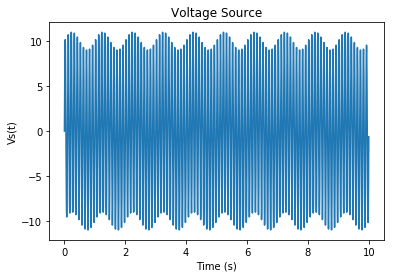

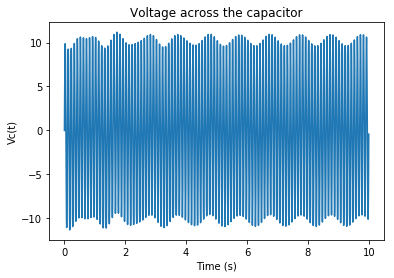

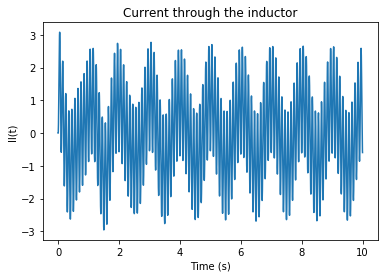

In [3]:
import numpy as np
import matplotlib.pyplot as plt

R = 10
C = 1
L = 1

t = np.arange(0,10,0.001)
Vs = np.sin(2 * np.pi * 1 * t) + 10 *  np.sin(2 * np.pi * 10 * t)

delta = 0.01

Vc = np.zeros(len(t))
Il = np.zeros(len(t))

for i in range(1,len(Vc)):
    Vc[i] = Vc[i-1] + delta * ( Il[i-1]/C  + (Vs[i-1] - Vc[i-1])/(R * C))
    Il[i] = Il[i-1] + delta * (Vs[i-1] - Vc[i-1])/L

plt.plot(t,Vs)
plt.xlabel('Time (s)')
plt.ylabel('Vs(t)')
plt.title('Voltage Source')
plt.show()

plt.plot(t,Vs - Vc)
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()

plt.plot(t,Il)
plt.xlabel('Time (s)')
plt.ylabel('Il(t)')
plt.title('Current through the inductor')
plt.show()

## Using FFT


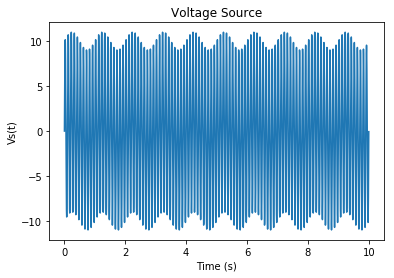

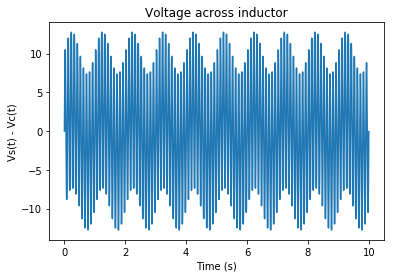

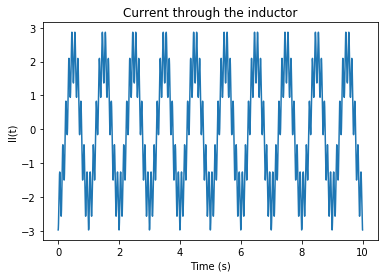

In [4]:
from numpy.fft import fft
from numpy.fft import ifft

R = 10.0
L = 0.2
C = 0.2
T = 10
t = np.arange(0,T,0.0001)

Vs = np.sin(2 * np.pi * 1 * t) + 10 *  np.sin(2 * np.pi * 10 * t)

N = len(t)
w = np.ones(N)
w[0:N/2 +1]= 2 * np.pi/T * np.array([np.arange(0,N/2 +1)])
w[N/2+1 : N] = 2 * np.pi/T * np.arange(-(N/2 -1),0)

Il= ifft(fft(Vs)/((1/(C * 1j * w + 0.0001)) + L * 1j * w))
Vc = ifft(fft(Vs) - L * 1j * w * fft(Il))
plt.plot(t,Vs)
plt.xlabel('Time (s)')
plt.ylabel('Vs(t)')
plt.title('Voltage Source')
plt.show()


plt.plot(t,(Vs - Vc))
plt.xlabel('Time (s)')
plt.ylabel('Vs(t) - Vc(t)')
plt.title('Voltage across inductor')
plt.show()

plt.plot(t,Il)
plt.xlabel('Time (s)')
plt.ylabel('Il(t)')
plt.title('Current through the inductor')
plt.show()